# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
import scipy.stats as stats
import warnings
import datetime as dt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
print(hospital_read_df.shape)
hospital_read_df.head()

(16860, 12)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/chadleonard/Springboard/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
ca_idx = clean_hospital_read_df.loc[clean_hospital_read_df.State == 'CA',:].index
print(len(ca_idx))


944


0.9796454545454545
1.0191774907749067
1.0300270588235299
0.9988320388349516
0.9966996784565909
0.9520115384615389
1.0240698412698412
1.0871206896551724
0.9666555555555555
1.011664346590908
1.002619607843138
0.9786729729729728
0.9612522058823532
0.9183775000000004
1.0325407821229058
0.9846836012861733
0.9655979865771818
1.0473028571428573
1.0134172839506166
1.0314315573770498
1.0446158974358974


/Users/chadleonard/Springboard/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0.9645857142857145
1.0009725274725276
0.9825725352112673
1.0143790613718409
1.0354303664921467
0.9104613636363635
0.9962839393939403
0.9194655172413794
0.9317691358024689
0.9543293103448275
1.0533890070921987
0.970825
1.034335365853659
1.0476842372881345
1.0231595482546192
1.0084169724770646
0.9430703703703706
1.0118029357798157
1.0127375
1.0037691542288554
0.9098243902439026
1.0183358490566032
0.9912935153583607
0.9517735849056607
1.034106688963211
0.947547619047619
0.9763101604278082
0.9637374999999998
1.0559614678899079
0.9902347826086957


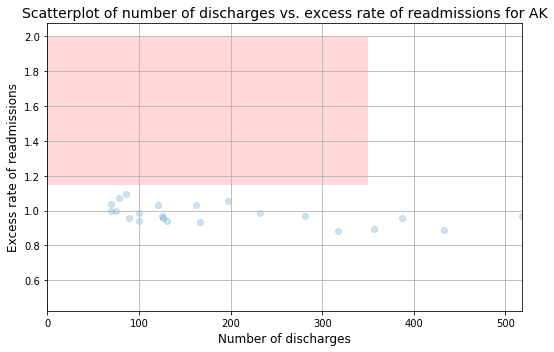

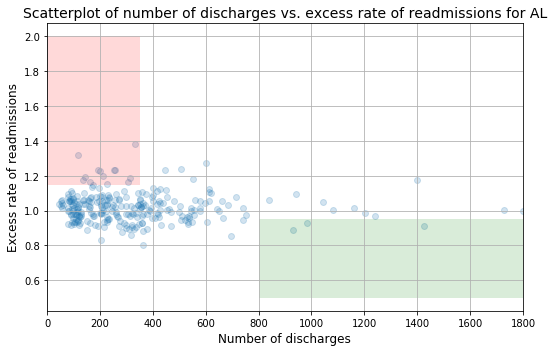

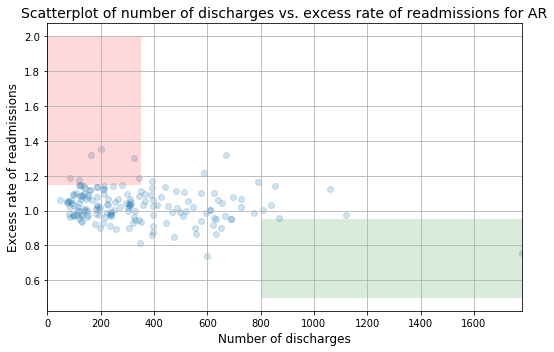

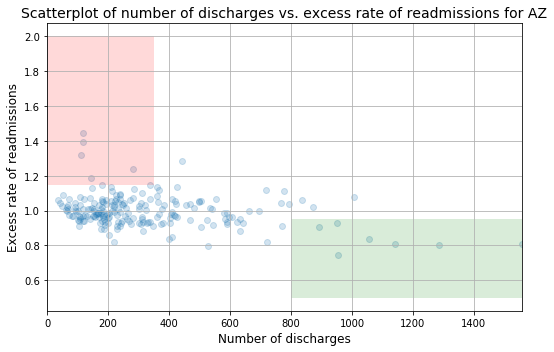

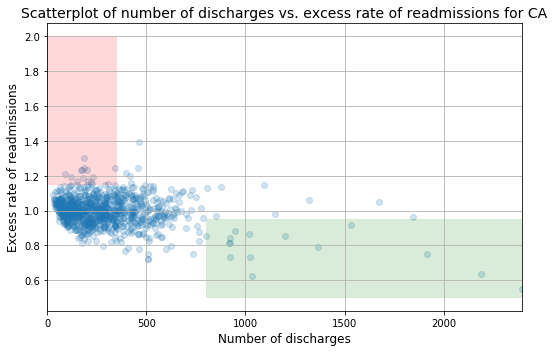

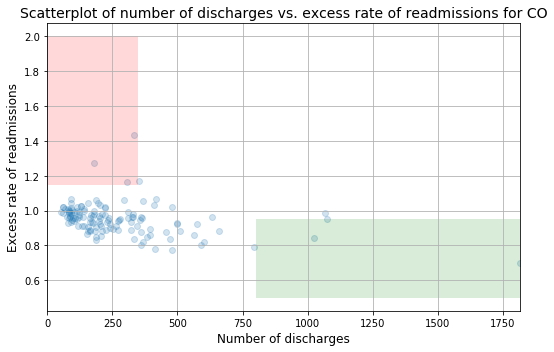

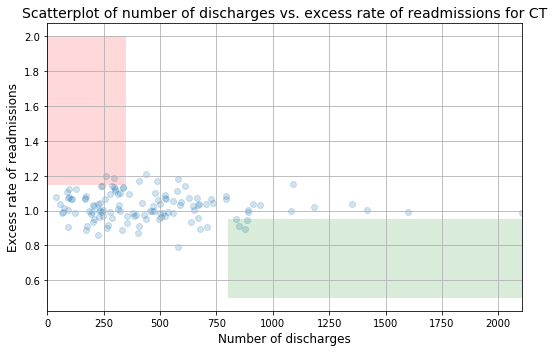

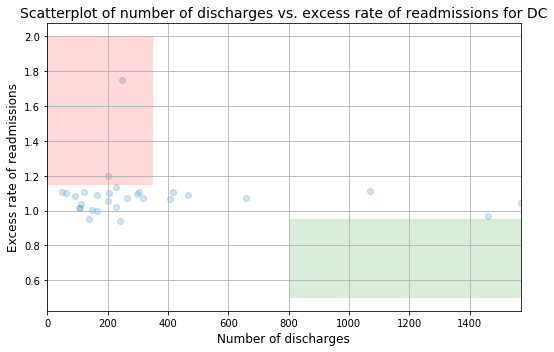

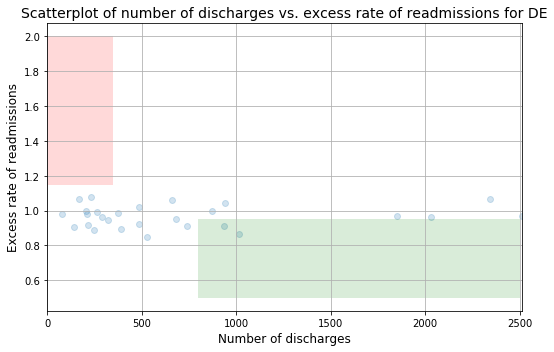

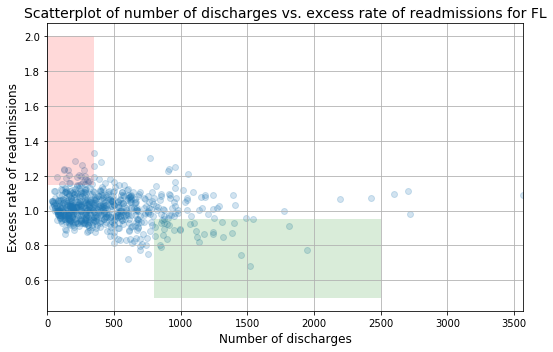

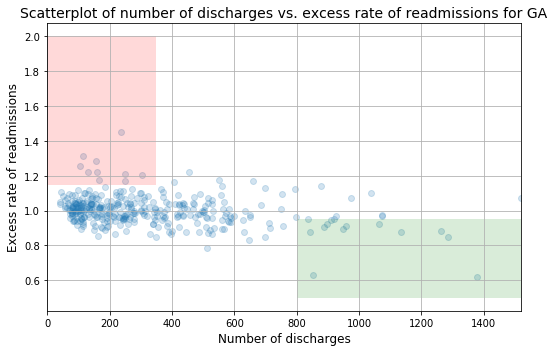

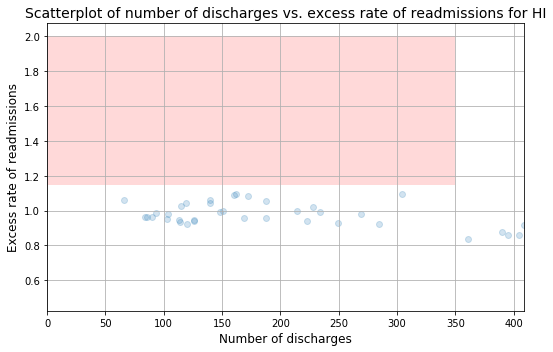

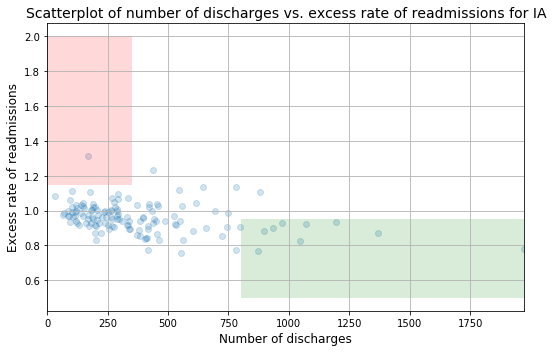

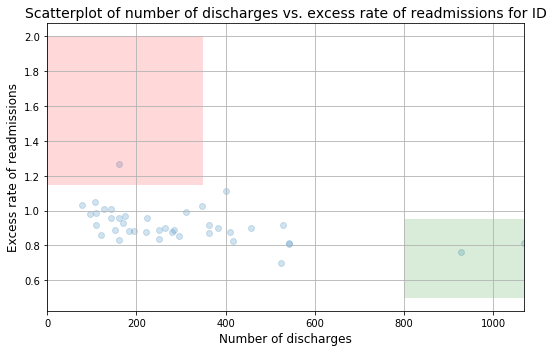

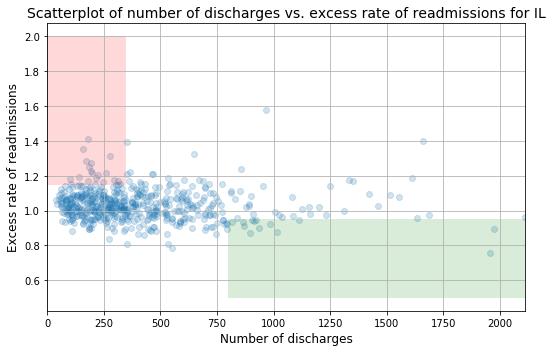

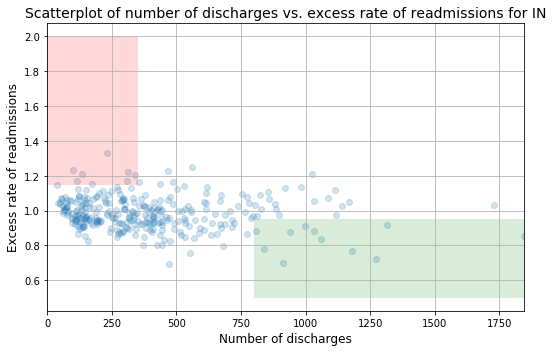

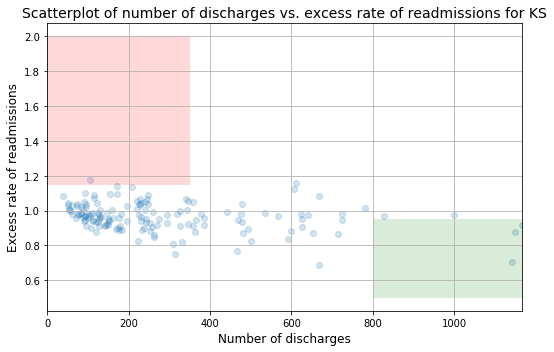

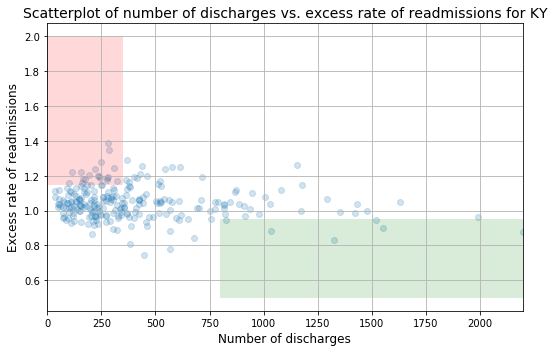

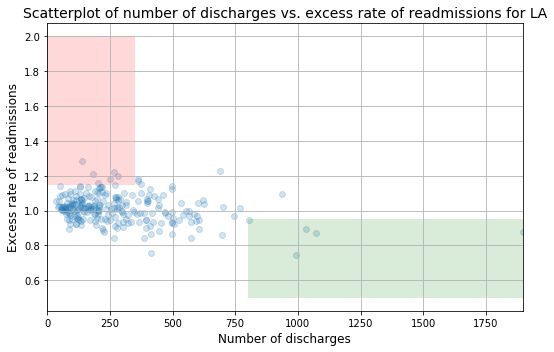

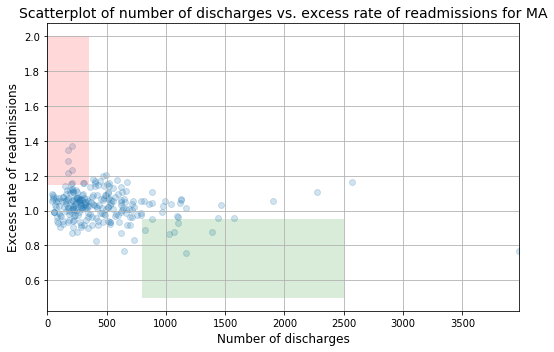

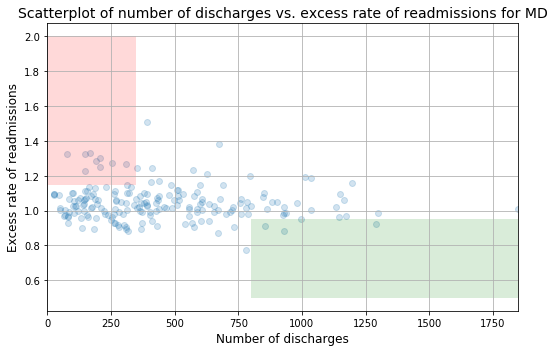

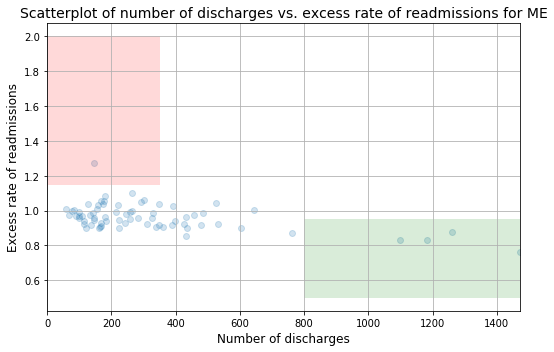

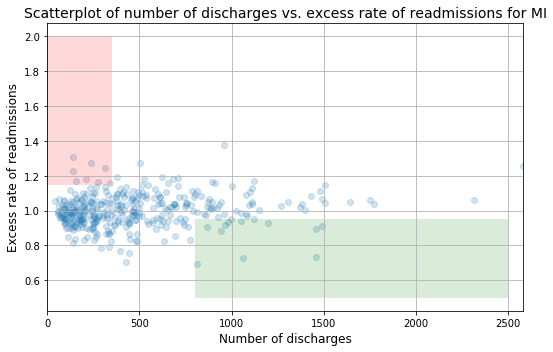

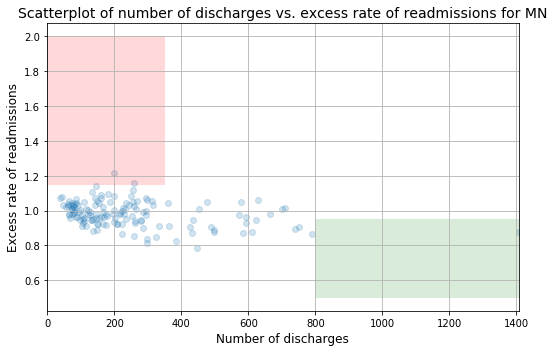

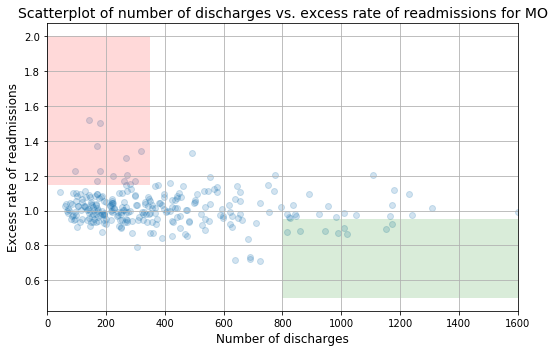

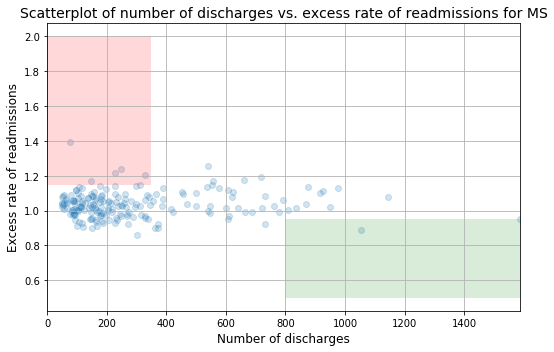

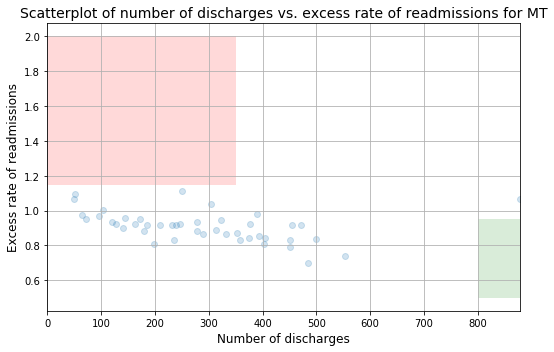

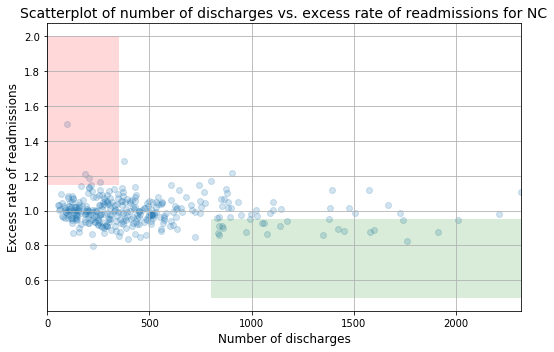

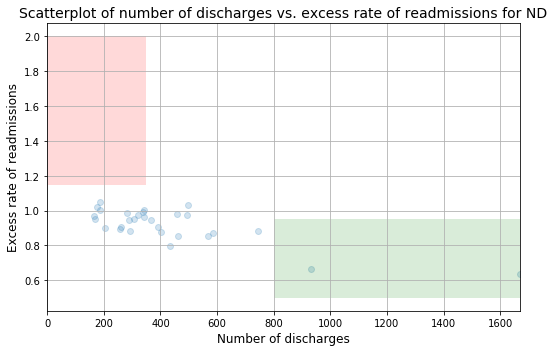

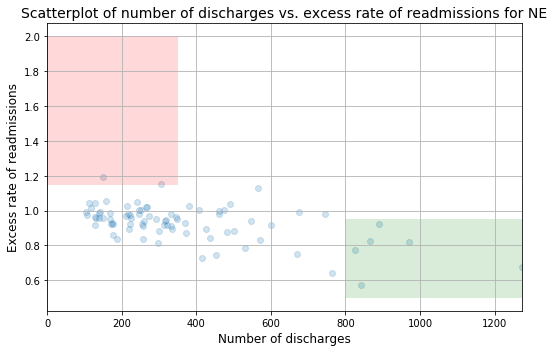

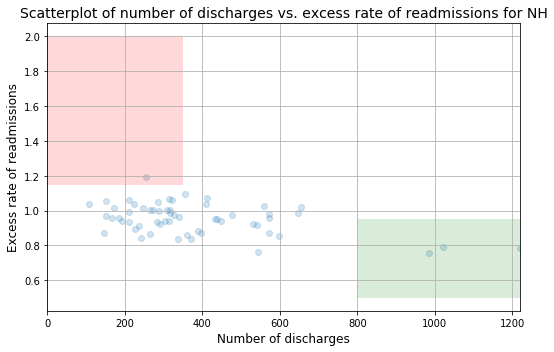

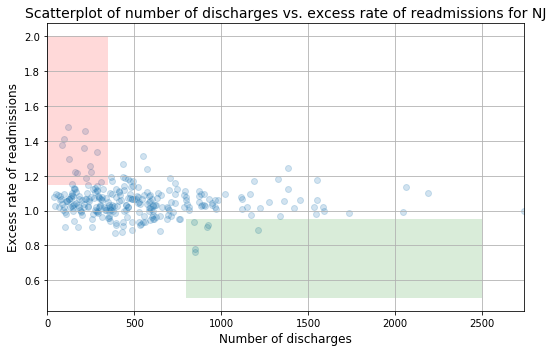

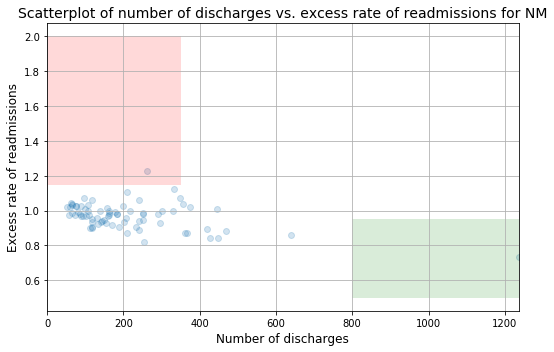

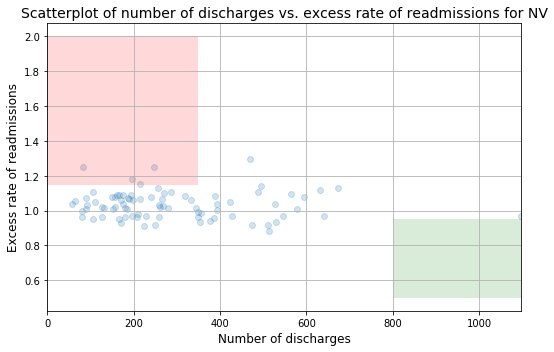

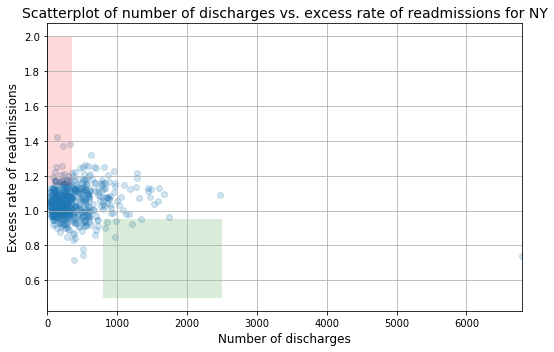

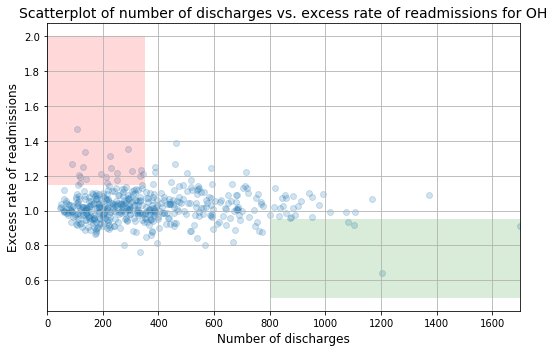

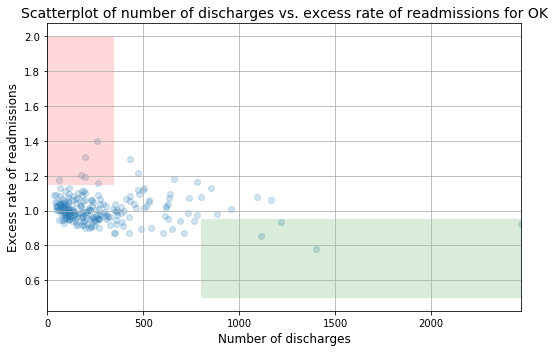

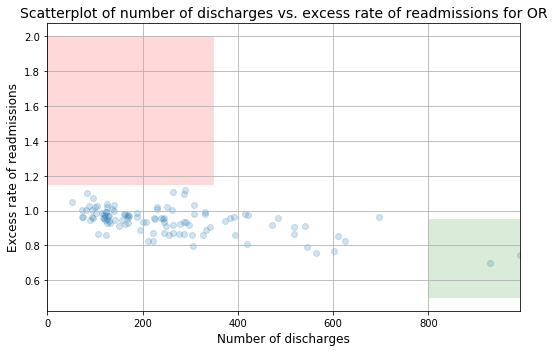

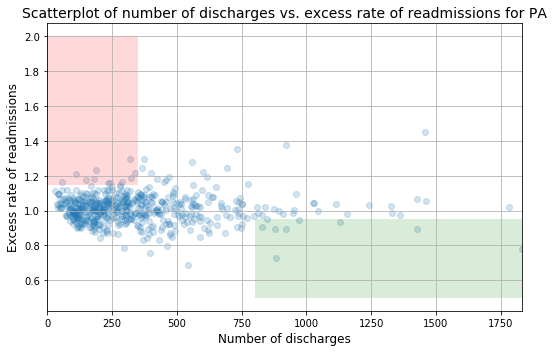

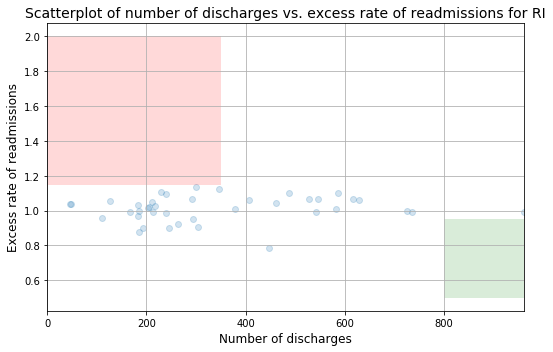

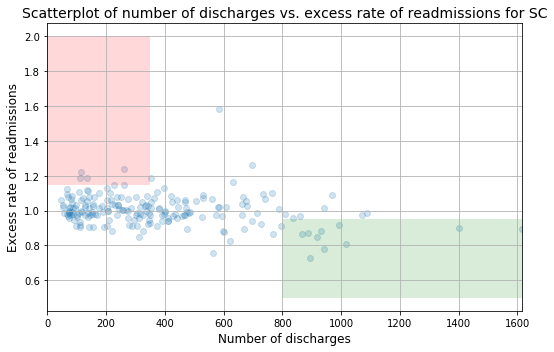

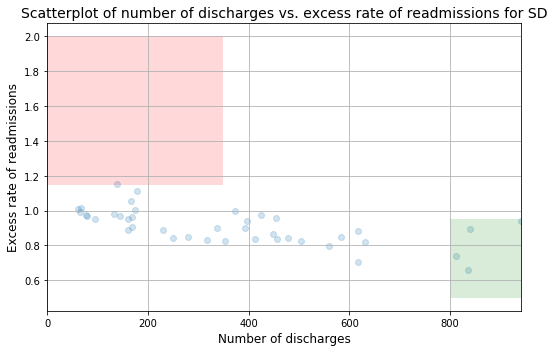

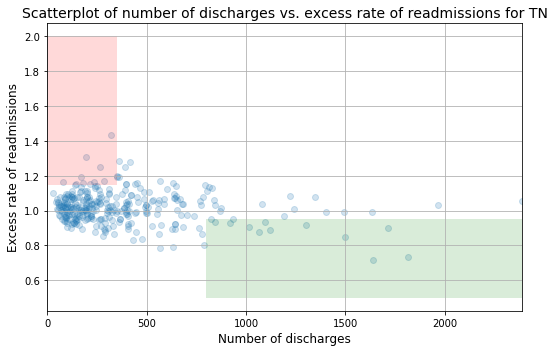

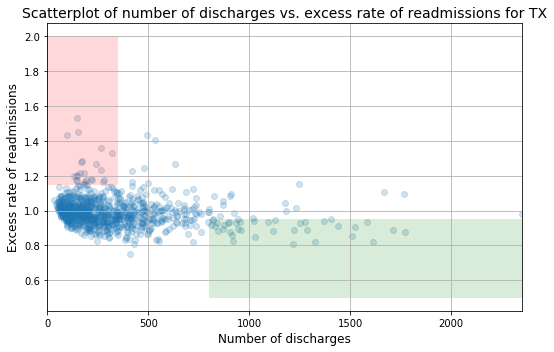

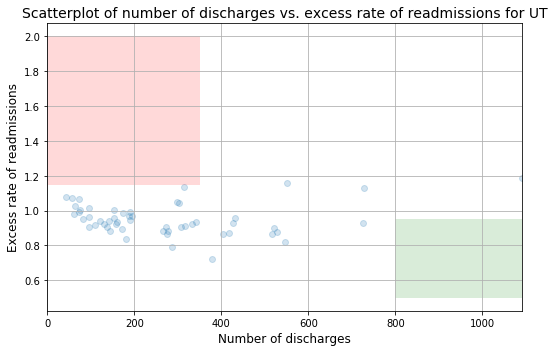

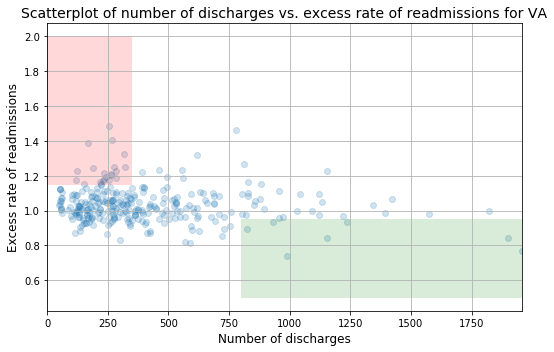

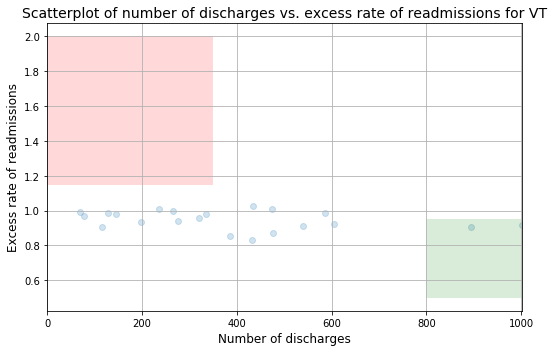

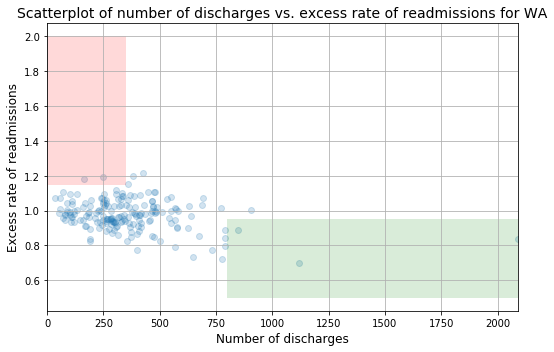

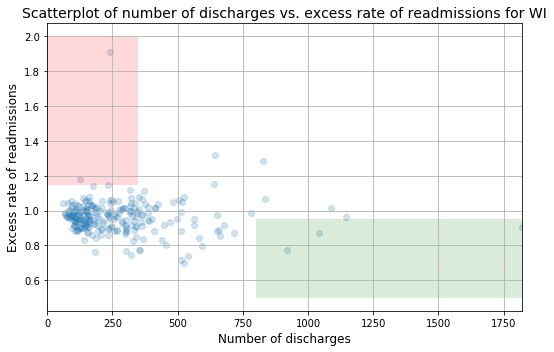

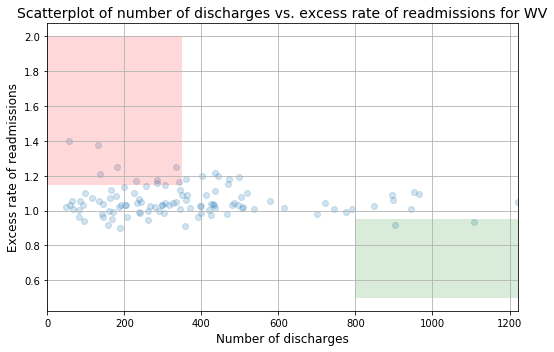

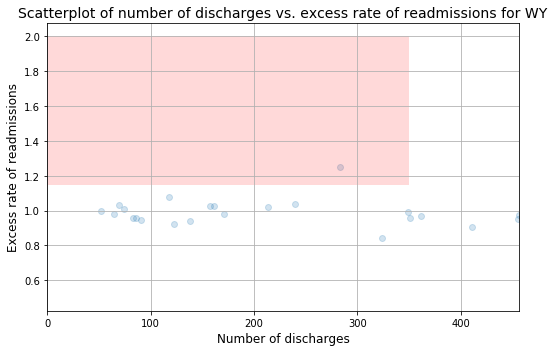

In [55]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
    # lists work better with matplotlib scatterplot function
for st in sorted(set(clean_hospital_read_df.State.values)):
    state_idx = clean_hospital_read_df.loc[clean_hospital_read_df.State == st,:].index
    x = clean_hospital_read_df.loc[state_idx, 'Number of Discharges'].values
    y = list(clean_hospital_read_df.loc[state_idx,'Excess Readmission Ratio'].values)
    print(clean_hospital_read_df.loc[state_idx,'Excess Readmission Ratio'].mean())

    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(x, y,alpha=0.2)

    ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
    ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

    ax.set_xlim([0, max(x)])
    ax.set_xlabel('Number of discharges', fontsize=12)
    ax.set_ylabel('Excess rate of readmissions', fontsize=12)
    ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions for '+st, fontsize=14)

    ax.grid(True)
    fig.tight_layout()

In [116]:
file = 'data/states_by__population.xlsx'
! ls data

DataF=pd.read_excel(file,sheet_name='ByState')

print("Column headings:")
DataF[['State_CD','YR_2016', 'outliers_in_pink']].head()
out = DataF.loc[DataF.outliers_in_pink == 1, 'State_CD'].values
no_out = DataF.loc[DataF.outliers_in_pink == 0, 'State_CD'].values
print(len(out))
print(len(no_out))
# [y for x in non_flat for y in x]
out_list = []
for i in out:
    #print(i)
    tmplist = [i for i in clean_hospital_read_df.loc[clean_hospital_read_df.State == i,'State'].index \
              if i not in [8818, 572, 136, 1698, 1242, 8126, 6643, 1892, 13615, 13666]]
    out_list += tmplist
out_list += list(b_idx)
print(len(out_list))

no_out_list = []
for i in no_out:
    #print(i)
    tmplist = [i for i in clean_hospital_read_df.loc[clean_hospital_read_df.State == i,'State'].index \
              if i not in list(b_idx)]
    no_out_list += tmplist
print(len(no_out_list))

cms_hospital_readmissions.csv ~$states_by__population.xlsx
states_by__population.xlsx
Column headings:
21
30
8417
3402


In [65]:
clean_hospital_read_df.loc[clean_hospital_read_df.State == 'VT',:].index

Int64Index([ 7212,  9124, 12170,  7795,  8098, 11205,  5941,  6910, 10858,
             9719,  8102, 13183, 13360,  4794,  5973, 12972, 12075,  7552,
            11489, 12163, 11757],
           dtype='int64')

In [109]:
clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 2500,:].index

Int64Index([8818, 572, 136, 1698, 1242, 8126, 6643, 1892, 13615, 13666], dtype='int64')

8417
1.025747059526653
3402
0.982340332147095


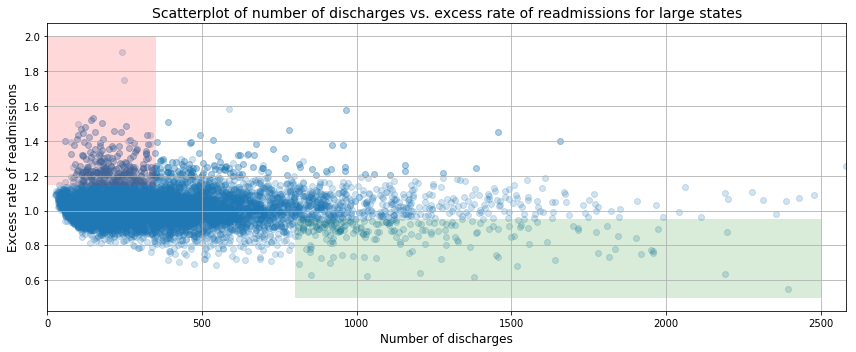

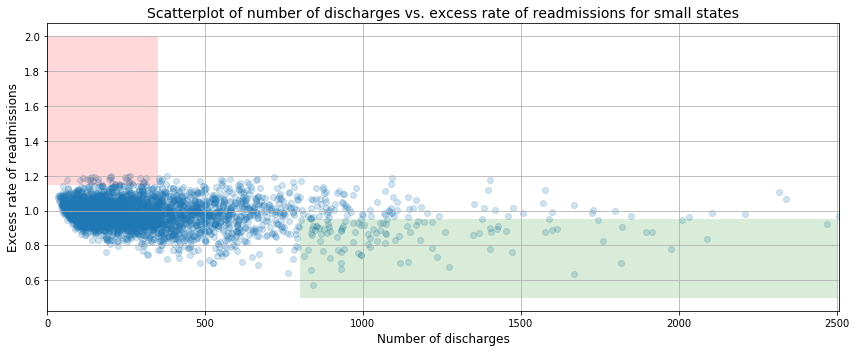

In [117]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
    # lists work better with matplotlib scatterplot function
n=0
for idx in [out_list,no_out_list]:
    print(len(idx))
    x = clean_hospital_read_df.loc[idx, 'Number of Discharges'].values
    y = list(clean_hospital_read_df.loc[idx,'Excess Readmission Ratio'].values)
    print(clean_hospital_read_df.loc[idx,'Excess Readmission Ratio'].mean())

    fig, ax = plt.subplots(figsize=(12,5))
    ax.scatter(x, y,alpha=0.2)

    ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
    ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

    if n == 0:
        txt = 'large states'
        n+=1
    else:
        txt = 'small states'
    ax.set_xlim([0, max(x)])
    ax.set_xlabel('Number of discharges', fontsize=12)
    ax.set_ylabel('Excess rate of readmissions', fontsize=12)
    ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions for '+txt, fontsize=14)

    ax.grid(True)
    fig.tight_layout()

In [129]:
clean_hospital_read_df.loc[out_list, 'Measure Name'].value_counts()

READM-30-HF-HRRP          1997
READM-30-PN-HRRP          1981
READM-30-COPD-HRRP        1935
READM-30-AMI-HRRP         1327
READM-30-HIP-KNEE-HRRP    1177
Name: Measure Name, dtype: int64

In [130]:
clean_hospital_read_df.loc[no_out_list, 'Measure Name'].value_counts()

READM-30-HF-HRRP          864
READM-30-PN-HRRP          850
READM-30-COPD-HRRP        819
READM-30-AMI-HRRP         486
READM-30-HIP-KNEE-HRRP    383
Name: Measure Name, dtype: int64

In [128]:
n = 0
for s in clean_hospital_read_df.loc[out_list, 'State'].value_counts().index:
    if s in clean_hospital_read_df.loc[no_out_list, 'State'].value_counts().index:
        print(s)
        n+=1
print(n)

AL
LA
MS
OK
SC
NC
WI
NV
IA
CO
WY
ID
MN
WA
CT
ME
NM
DC
18


In [125]:
clean_hospital_read_df.loc[no_out_list, 'State'].value_counts().index

Index(['NC', 'AL', 'LA', 'WI', 'OK', 'SC', 'MS', 'WA', 'KS', 'MN', 'IA', 'CO',
       'CT', 'OR', 'NV', 'NE', 'NM', 'ME', 'NH', 'UT', 'MT', 'SD', 'RI', 'ID',
       'HI', 'ND', 'DC', 'DE', 'WY', 'VT'],
      dtype='object')

In [255]:
b_idx = clean_hospital_read_df.loc[(clean_hospital_read_df['Excess Readmission Ratio'] > 1.15) ,\
                                   'Excess Readmission Ratio'].index
len(b_idx)

619

In [256]:
no_b_idx = [i for i in clean_hospital_read_df.index if i not in b_idx ]
no_b_idx[:5]

[16857, 14582, 15606, 15615, 14551]

In [273]:
#notnullz = df_2.loc[df_2['Excess Readmission Ratio'].notnull()].index
#len(notnullz)

notnullz = clean_hospital_read_df.loc[clean_hospital_read_df['Excess Readmission Ratio'].notnull()].index
#notnullz = [idx for idx in notnullz if idx in no_b_idx]
len(notnullz)

11497

In [248]:
v = clean_hospital_read_df.loc[b_idx,'Measure Name'].value_counts()
print(v)
print(sum(v))
print(v[0])
print(sum(v[:2])/sum(v))
print(sum(v[2:])/sum(v))
print(sum(v[:1])/sum(v))
print(sum(v[1:])/sum(v))

READM-30-HIP-KNEE-HRRP    303
READM-30-PN-HRRP          103
READM-30-HF-HRRP           97
READM-30-COPD-HRRP         63
READM-30-AMI-HRRP          53
Name: Measure Name, dtype: int64
619
303
0.6558966074313409
0.3441033925686591
0.4894991922455573
0.5105008077544426


In [274]:
df_new = pd.concat([clean_hospital_read_df.loc[notnullz,:], \
                    pd.get_dummies( clean_hospital_read_df.loc[notnullz,'Measure Name'])],\
          sort=False, axis=1)
df_new.drop(['Measure Name','MeasureNameCodes', 'StateId', 'Footnote', \
             'Start Date', 'End Date', 'Provider Number'], \
            axis=1, inplace=True)
df_new.columns

Index(['Hospital Name', 'State', 'Number of Discharges',
       'Excess Readmission Ratio', 'Predicted Readmission Rate',
       'Expected Readmission Rate', 'Number of Readmissions',
       'READM-30-AMI-HRRP', 'READM-30-COPD-HRRP', 'READM-30-HF-HRRP',
       'READM-30-HIP-KNEE-HRRP', 'READM-30-PN-HRRP'],
      dtype='object')

In [275]:
df_new.loc[df_new['Excess Readmission Ratio'] > 1.15,'NEW_TARGET'] = 1
df_new['NEW_TARGET'].fillna(0,inplace=True)
df_new.head()

,Hospital Name,State,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,READM-30-AMI-HRRP,READM-30-COPD-HRRP,READM-30-HF-HRRP,READM-30-HIP-KNEE-HRRP,READM-30-PN-HRRP,NEW_TARGET
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,MD,25,1.0914,26.8,24.6,12.0,1,0,0,0,0,0.0
1699,ATLANTIC GENERAL HOSPITAL,MD,27,1.0961,24.8,22.6,12.0,1,0,0,0,0,0.0
1774,MERCY MEDICAL CENTER INC,MD,28,1.0934,24.4,22.3,12.0,1,0,0,0,0,0.0
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,CA,29,1.0908,21.0,19.3,11.0,0,0,1,0,0,0.0
1290,PALMERTON HOSPITAL,PA,30,1.1123,23.2,20.9,13.0,1,0,0,0,0,0.0


In [276]:
df_new.NEW_TARGET.value_counts()

0.0    10878
1.0      619
Name: NEW_TARGET, dtype: int64

In [190]:
np.corrcoef(df_new[['Excess Readmission Ratio','READM-30-AMI-HRRP', \
         'READM-30-COPD-HRRP', 'READM-30-HF-HRRP','READM-30-HIP-KNEE-HRRP', 'READM-30-PN-HRRP']].T)[:2]

array([[ 1.        , -0.16860701, -0.14026484, -0.19091676,  0.45596082,
        -0.18510748],
       [-0.16860701,  1.        , -0.10300602, -0.13191079, -0.29964532,
        -0.1367173 ]])

In [278]:
c = ['READM-30-HIP-KNEE-HRRP','READM-30-PN-HRRP']
df_new.loc[(df_new['READM-30-HIP-KNEE-HRRP'] == 1) | df_new['READM-30-PN-HRRP'] == 1,'TOP_TWO'] = 1
df_new['TOP_TWO'].fillna(0,inplace=True)
df_new.head()

,Hospital Name,State,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,READM-30-AMI-HRRP,READM-30-COPD-HRRP,READM-30-HF-HRRP,READM-30-HIP-KNEE-HRRP,READM-30-PN-HRRP,NEW_TARGET,TOP_TWO
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,MD,25,1.0914,26.8,24.6,12.0,1,0,0,0,0,0.0,0.0
1699,ATLANTIC GENERAL HOSPITAL,MD,27,1.0961,24.8,22.6,12.0,1,0,0,0,0,0.0,0.0
1774,MERCY MEDICAL CENTER INC,MD,28,1.0934,24.4,22.3,12.0,1,0,0,0,0,0.0,0.0
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,CA,29,1.0908,21.0,19.3,11.0,0,0,1,0,0,0.0,0.0
1290,PALMERTON HOSPITAL,PA,30,1.1123,23.2,20.9,13.0,1,0,0,0,0,0.0,0.0


In [268]:
df_new.loc[df_new['Excess Readmission Ratio'] > 1.15,'TGT'] = 1
df_new.head()

,Hospital Name,State,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,READM-30-AMI-HRRP,READM-30-COPD-HRRP,READM-30-HF-HRRP,READM-30-HIP-KNEE-HRRP,READM-30-PN-HRRP,TOP_TWO,TGT
556,ST JOSEPH'S HOSPITAL,PA,56,1.1660,23.6,20.2,23.0,0,0,0,0,1,1.0,1.0
29,RALEIGH GENERAL HOSPITAL,WV,57,1.3992,8.5,6.1,11.0,0,0,0,1,0,1.0,1.0
473,HARMON MEMORIAL HOSPITAL,OK,62,1.1764,27.6,23.5,27.0,0,0,1,0,0,0.0,1.0
31,SOUTHWEST MS REGIONAL MEDICAL CENTER,MS,76,1.3966,8.9,6.3,13.0,0,0,0,1,0,1.0,1.0
382,ST MARY'S MEDICAL CENTER,FL,76,1.1912,26.9,22.6,31.0,0,0,1,0,0,0.0,1.0


In [279]:
colz = ['ExcessReadmissRatio ', 'READM-30-AMI-HRRP   ',    'READM-30-COPD-HRRP    ',\
        'READM-30-HF-HRRP     ', 'READM-30-HIP-KNEE-HRRP', 'READM-30-PN-HRRP    ', 'NEW_TARGET           ',\
        'TOP_TWO              ']

cols1 = ['Excess Readmission Ratio','READM-30-AMI-HRRP', 'READM-30-COPD-HRRP', 'READM-30-HF-HRRP',\
         'READM-30-HIP-KNEE-HRRP', 'READM-30-PN-HRRP','NEW_TARGET','TOP_TWO']
cov_mat = np.corrcoef(df_new[cols1].T)

def format_cov(mat,columns):
    for i in range(len(columns)):
        c = columns[i][:20] + ': \t' + '\t' * i
        for a in mat[i][i:]:
            val = str(round(a,4))
            if a > 0.0:
                c =  c + ' '+ (val+ '000')[:6] + ' '
            else:
                c = c + (val+ '000')[:7] + ' '
        #print(len(c))  #len is 92
        print(c)
        
format_cov(cov_mat,colz)

ExcessReadmissRatio : 	 1.0000  0.0001 -0.0195 -0.0251  0.0810 -0.0167  0.5649  0.0397 
READM-30-AMI-HRRP   : 		 1.0000 -0.2384 -0.2445 -0.1573 -0.2420 -0.0455 -0.3220 
READM-30-COPD-HRRP  : 			 1.0000 -0.3189 -0.2052 -0.3156 -0.0759 -0.4199 
READM-30-HF-HRRP    : 				 1.0000 -0.2104 -0.3236 -0.0497 -0.4306 
READM-30-HIP-KNEE-HR: 					 1.0000 -0.2082  0.2725  0.4887 
READM-30-PN-HRRP    : 						 1.0000 -0.0424  0.7516 
NEW_TARGET          : 							 1.0000  0.1460 
TOP_TWO             : 								 1.0000 


In [247]:
colz = ['ExcessReadmissRatio ', 'READM-30-AMI-HRRP   ', 'READM-30-COPD-HRRP    ',\
        'READM-30-HF-HRRP     ', 'READM-30-HIP-KNEE-HRRP', 'READM-30-PN-HRRP    ']

cols1 = ['Excess Readmission Ratio','READM-30-AMI-HRRP', 'READM-30-COPD-HRRP', 'READM-30-HF-HRRP',\
         'READM-30-HIP-KNEE-HRRP', 'READM-30-PN-HRRP']

df_2 = pd.concat([clean_hospital_read_df.loc[notnullz,'Excess Readmission Ratio'], \
                    pd.get_dummies( clean_hospital_read_df.loc[notnullz,'Measure Name'])],\
          sort=False, axis=1)

cov_mat = np.corrcoef(df_2.loc[notnullz, cols1].T)

def format_cov(mat,columns):
    for i in range(len(columns)):
        c = columns[i][:20] + ': \t' + '\t' * i
        for a in mat[i][i:]:
            val = str(round(a,4))
            if a > 0.0:
                c =  c + ' '+ (val+ '000')[:6] + ' '
            else:
                c = c + (val+ '000')[:7] + ' '
        #print(len(c))  #len is 92
        print(c)
        
format_cov(cov_mat,colz)

ExcessReadmissRatio : 	 1.0000  0.0001 -0.0195 -0.0251  0.0810 -0.0167 
READM-30-AMI-HRRP   : 		 1.0000 -0.2384 -0.2445 -0.1573 -0.2420 
READM-30-COPD-HRRP  : 			 1.0000 -0.3189 -0.2052 -0.3156 
READM-30-HF-HRRP    : 				 1.0000 -0.2104 -0.3236 
READM-30-HIP-KNEE-HR: 					 1.0000 -0.2082 
READM-30-PN-HRRP    : 						 1.0000 


In [194]:
notnullz = df_2.loc[df_2['Excess Readmission Ratio'].notnull()].index
len(notnullz)

11196

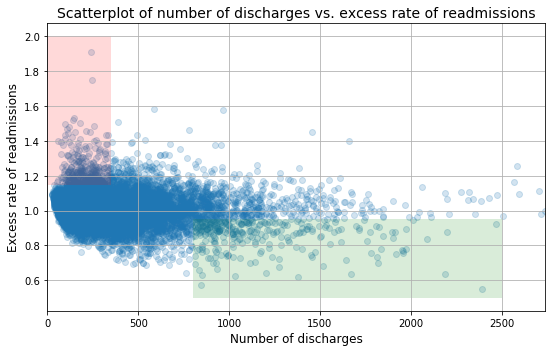

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

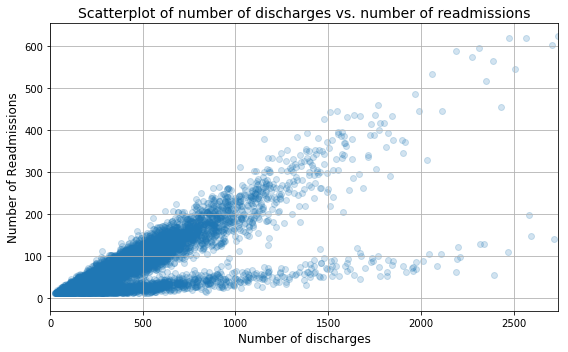

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Number of Readmissions'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of Readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. number of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

11.0


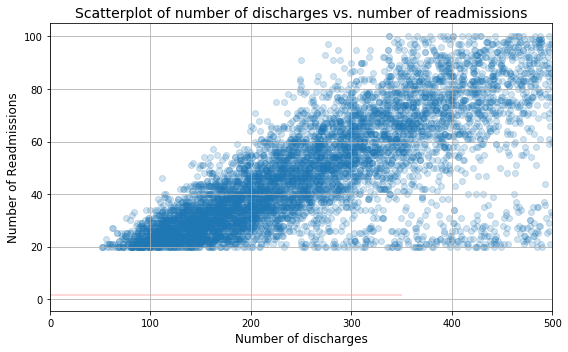

In [11]:
r_idx = ( clean_hospital_read_df['Number of Readmissions'] >= 20 ) & \
       (clean_hospital_read_df['Number of Readmissions'] <= 100) & \
       (clean_hospital_read_df['Number of Discharges'] <= 500)
r_idx
print(clean_hospital_read_df['Number of Readmissions'].min())

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = clean_hospital_read_df.loc[r_idx, 'Number of Discharges'].values
y = list(clean_hospital_read_df.loc[r_idx,'Number of Readmissions'].values)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of Readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. number of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [12]:
clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [13]:
print(clean_hospital_read_df.shape)
for col in ['State','Measure Name']:
    print(col)
    print(clean_hospital_read_df.loc[r_idx,col].value_counts())

(11578, 12)
State
CA    607
TX    534
FL    356
PA    342
NY    324
IL    297
OH    284
GA    214
NC    182
TN    181
VA    181
MI    174
IN    171
AL    169
MO    167
LA    150
KY    143
WI    142
NJ    131
AZ    128
OK    126
WA    124
MA    115
SC    111
AR    107
MS    106
MD     87
IA     84
MN     78
CO     77
KS     72
OR     69
CT     65
WV     64
NV     55
NE     52
ME     46
NM     45
NH     38
ID     26
MT     26
RI     25
ND     23
HI     23
UT     22
SD     21
DC     20
DE     13
WY     13
AK     12
VT     11
Name: State, dtype: int64
Measure Name
READM-30-PN-HRRP          1872
READM-30-COPD-HRRP        1778
READM-30-HF-HRRP          1579
READM-30-AMI-HRRP         1118
READM-30-HIP-KNEE-HRRP     286
Name: Measure Name, dtype: int64


In [14]:
clean_hospital_read_df['Measure Name'].value_counts()

READM-30-HF-HRRP          2841
READM-30-PN-HRRP          2799
READM-30-COPD-HRRP        2738
READM-30-AMI-HRRP         1807
READM-30-HIP-KNEE-HRRP    1393
Name: Measure Name, dtype: int64

In [15]:
for s in set(clean_hospital_read_df.State):
    print(s)
    print(clean_hospital_read_df.loc[clean_hospital_read_df.State == s, 'Measure Name'].value_counts())

AR
READM-30-HF-HRRP          42
READM-30-PN-HRRP          41
READM-30-COPD-HRRP        41
READM-30-AMI-HRRP         24
READM-30-HIP-KNEE-HRRP    22
Name: Measure Name, dtype: int64
CA
READM-30-HF-HRRP          231
READM-30-PN-HRRP          230
READM-30-COPD-HRRP        224
READM-30-AMI-HRRP         160
READM-30-HIP-KNEE-HRRP     99
Name: Measure Name, dtype: int64
LA
READM-30-HF-HRRP          67
READM-30-PN-HRRP          65
READM-30-COPD-HRRP        60
READM-30-AMI-HRRP         37
READM-30-HIP-KNEE-HRRP    22
Name: Measure Name, dtype: int64
GA
READM-30-HF-HRRP          92
READM-30-PN-HRRP          91
READM-30-COPD-HRRP        89
READM-30-AMI-HRRP         50
READM-30-HIP-KNEE-HRRP    36
Name: Measure Name, dtype: int64
OH
READM-30-COPD-HRRP        116
READM-30-HF-HRRP          116
READM-30-PN-HRRP          114
READM-30-AMI-HRRP          76
READM-30-HIP-KNEE-HRRP     65
Name: Measure Name, dtype: int64
DC
READM-30-HF-HRRP          7
READM-30-COPD-HRRP        7
READM-30-PN-HRRP          

In [16]:
clean_hospital_read_df['MeasureNameCodes'] = clean_hospital_read_df['Measure Name'].astype('category').cat.codes
clean_hospital_read_df['StateId'] = clean_hospital_read_df['State'].astype('category').cat.codes

In [17]:
n_idx = clean_hospital_read_df['Number of Readmissions'].isnull() == False

In [18]:
np.corrcoef(clean_hospital_read_df.loc[n_idx,'StateId'],\
            clean_hospital_read_df.loc[n_idx,'Number of Readmissions'])

array([[ 1.        , -0.00329482],
       [-0.00329482,  1.        ]])

In [19]:
#clean_hospital_read_df['State'].value_counts()

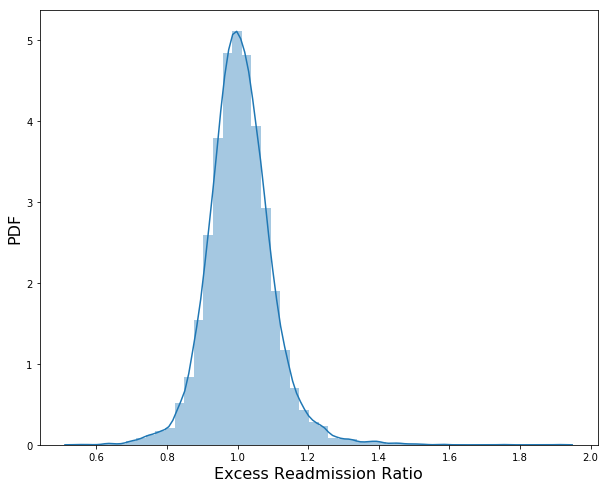

In [20]:
idx_temp = clean_hospital_read_df.loc[:,'Excess Readmission Ratio'].isnull() == False
clean_hosp_nonull_excess_readmis = \
    clean_hospital_read_df.loc[idx_temp,['Excess Readmission Ratio','Number of Discharges']]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
    _ = sns.distplot(clean_hosp_nonull_excess_readmis['Excess Readmission Ratio'])
    plt.xlabel('Excess Readmission Ratio', fontsize=16)
    plt.ylabel('PDF', fontsize=16)

365.4662085761503


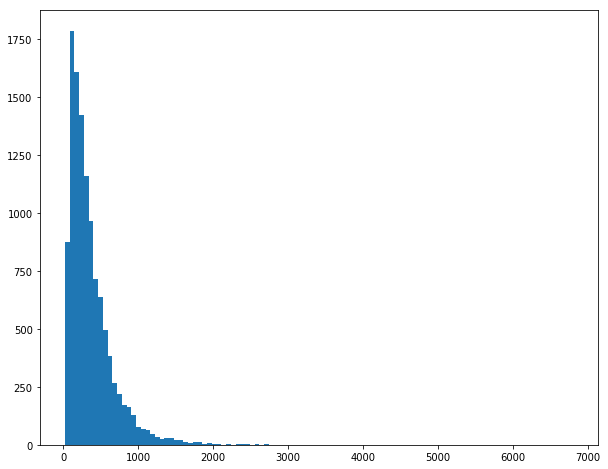

In [21]:
n = int(np.sqrt(clean_hosp_nonull_excess_readmis.shape[0]))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
_ = plt.hist(clean_hosp_nonull_excess_readmis['Number of Discharges'], bins=n)
print(np.mean(clean_hosp_nonull_excess_readmis['Number of Discharges']))

In [22]:

clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date', 'MeasureNameCodes',
       'StateId'],
      dtype='object')

In [23]:
daze = (clean_hospital_read_df.loc[n_idx,'End Date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y')) \
- clean_hospital_read_df.loc[n_idx,'Start Date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y'))).dt.days
daze[:5]

1832    1095
1699    1095
1774    1095
1853    1095
1290    1095
dtype: int64

In [24]:
np.corrcoef(daze,\
            clean_hospital_read_df.loc[n_idx,'Number of Readmissions'])

/Users/chadleonard/Springboard/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/chadleonard/Springboard/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])

In [25]:
clean_hospital_read_df['Start Date'].head()

16857    07/01/2010
14582    07/01/2010
15606    07/01/2010
15615    07/01/2010
14551    07/01/2010
Name: Start Date, dtype: object

In [26]:
i_idx = clean_hospital_read_df['Excess Readmission Ratio'].isnull() == False

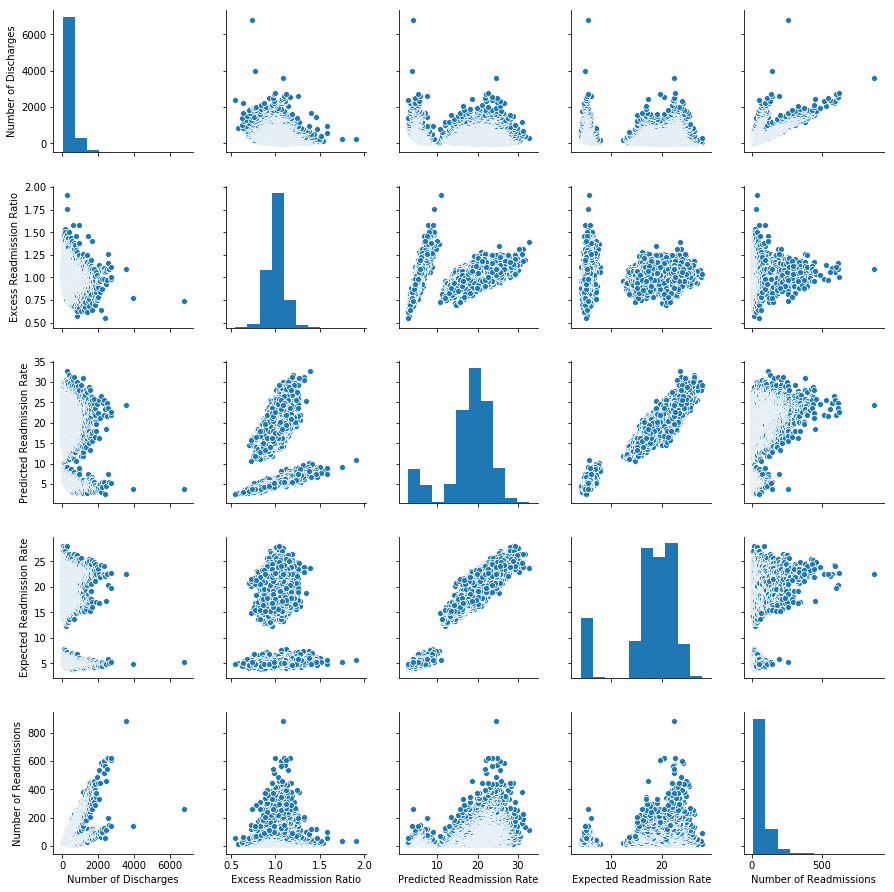

In [27]:
cols = ['Number of Discharges', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions']
_ = sns.pairplot(clean_hospital_read_df.loc[i_idx,cols])

In [28]:
clean_hospital_read_df[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 5 columns):
Number of Discharges          11578 non-null int64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
dtypes: float64(4), int64(1)
memory usage: 862.7 KB


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [29]:
null_exp_rates_indx = clean_hospital_read_df.loc[clean_hospital_read_df['Expected Readmission Rate'].isnull()\
                                                 , :].index

null_excess_ratio_indx = clean_hospital_read_df.loc[clean_hospital_read_df['Excess Readmission Ratio'].isnull()\
                                                 , :].index

excess_ratio_indx = [i for i in clean_hospital_read_df.index if i not in null_excess_ratio_indx]

exp_rates_indx = [i for i in clean_hospital_read_df.index if i not in null_exp_rates_indx]

null_pred_rates_indx = clean_hospital_read_df.loc[clean_hospital_read_df['Predicted Readmission Rate'].isnull()\
                                                 , :].index

pred_rates_indx = [i for i in clean_hospital_read_df.index if i not in null_pred_rates_indx]

clean_hospital_read_df.loc[null_exp_rates_indx[0],'Expected Readmission Rate']

nan

In [30]:
np.sum(null_exp_rates_indx != null_pred_rates_indx)

0

In [31]:
dis = clean_hospital_read_df.loc[exp_rates_indx, 'Number of Discharges'].values
new_dis = (dis - np.mean(dis)) / np.std(dis)
print(dis[:5])
new_dis

[25 27 28 29 30]


array([-1.10275613, -1.09627821, -1.09303925, ..., 10.37935392,
       11.70732715, 20.81851913])

In [32]:
print(np.corrcoef(new_dis,\
                  clean_hospital_read_df.loc[exp_rates_indx,'Expected Readmission Rate'])[0,1])

print(np.corrcoef(clean_hospital_read_df.loc[pred_rates_indx,'Number of Discharges'],\
                  clean_hospital_read_df.loc[pred_rates_indx,'Predicted Readmission Rate'])[0,1])

print(np.corrcoef(clean_hospital_read_df.loc[pred_rates_indx,'Number of Discharges'],\
                  clean_hospital_read_df.loc[pred_rates_indx,'Number of Readmissions'])[0,1])

-0.13109068110461916
-0.13516277105208457
0.7912724087040404


In [33]:
print(clean_hospital_read_df.shape)
clean_hospital_read_df.columns

(11578, 14)


Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date', 'MeasureNameCodes',
       'StateId'],
      dtype='object')

In [34]:
lt_100_idx = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100, \
                                 'Number of Discharges'].index
lt_500_idx = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 500, \
                                 'Number of Discharges'].index

gt_1000_idx = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']  > 1000, \
                                 'Number of Discharges'].index
bt_100_1000_idx = clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges']  > 99) & \
                (clean_hospital_read_df['Number of Discharges']  < 1001), 'Number of Discharges'].index

bt_500_1000_idx = clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges']  > 499) & \
                (clean_hospital_read_df['Number of Discharges']  < 1001), 'Number of Discharges'].index


len(lt_100_idx) + len(gt_1000_idx) + len(bt_100_1000_idx)

11578

In [35]:
clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']  > 1000, \
                                 'Number of Discharges'].index

Int64Index([11757,   821,  2363,  7188,  2341,  7473, 12428, 12862,   359,
            12181,
            ...
             8818,   572,   136,  1698,  1242,  8126,  6643,  1892, 13615,
            13666],
           dtype='int64', length=463)

In [36]:
lt_500_excess_rat_idx = \
   list(clean_hospital_read_df.loc[lt_500_idx,'Excess Readmission Ratio'].isnull() == False )

In [37]:
len(lt_500_excess_rat_idx)

8964

In [38]:
len(clean_hospital_read_df.loc[list(lt_500_excess_rat_idx),'Excess Readmission Ratio'])

8883

In [39]:
nonull_gt_1000_idx = \
   (clean_hospital_read_df.loc[gt_1000_idx,'Excess Readmission Ratio'].isnull() == False).index

In [40]:
#nonull_gt_1000_idx.value_counts()

In [41]:
bt_nn_500_1000_idx =(clean_hospital_read_df.loc[bt_500_1000_idx,'Excess Readmission Ratio'].isnull() == False).index

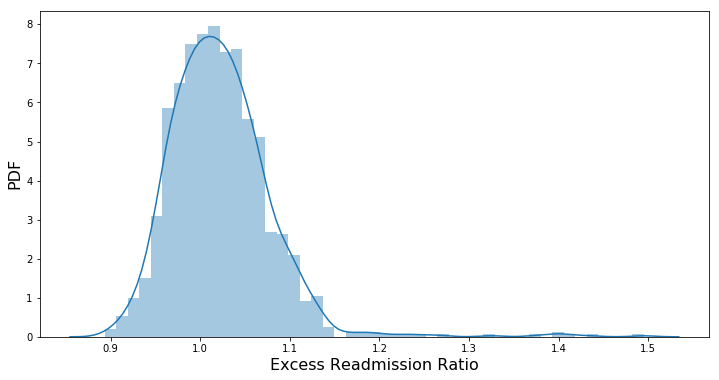

In [42]:
lt_100_vals = clean_hosp_nonull_excess_readmis.loc[\
                (clean_hosp_nonull_excess_readmis['Number of Discharges'] < 100), 'Excess Readmission Ratio'] 


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    _ = sns.distplot(lt_100_vals)
    plt.xlabel('Excess Readmission Ratio', fontsize=16)
    plt.ylabel('PDF', fontsize=16)

In [43]:
np.sum(lt_100_vals >= 1.2)

12

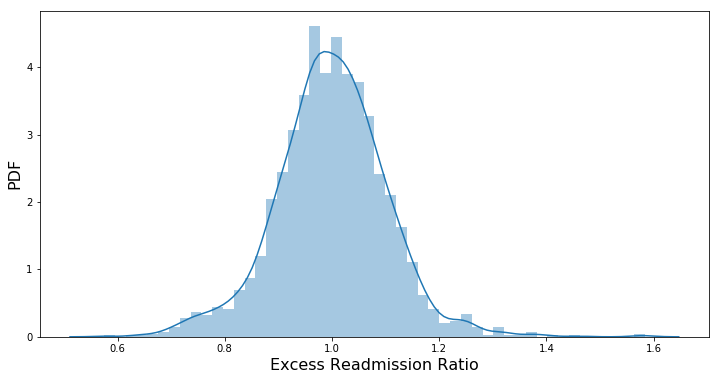

In [44]:
bt_500_1000 = clean_hosp_nonull_excess_readmis.loc[\
                (clean_hosp_nonull_excess_readmis['Number of Discharges'] < 1001) & \
                (clean_hosp_nonull_excess_readmis['Number of Discharges'] > 499), 'Excess Readmission Ratio'] 


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    _ = sns.distplot(bt_500_1000)
    plt.xlabel('Excess Readmission Ratio', fontsize=16)
    plt.ylabel('PDF', fontsize=16)

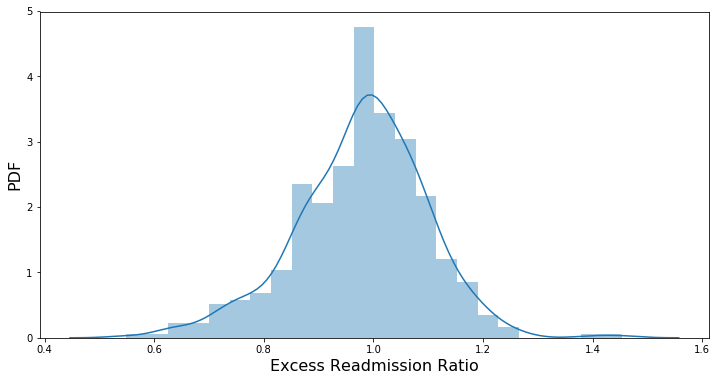

In [45]:
nonull_gt_1000 = clean_hosp_nonull_excess_readmis.loc[\
                clean_hosp_nonull_excess_readmis['Number of Discharges'] > 1000, 'Excess Readmission Ratio'] 

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    _ = sns.distplot(nonull_gt_1000)
    plt.xlabel('Excess Readmission Ratio', fontsize=16)
    plt.ylabel('PDF', fontsize=16)

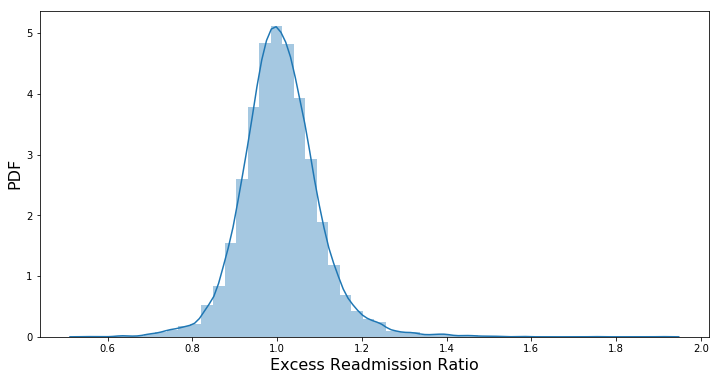

In [46]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    _ = sns.distplot(clean_hosp_nonull_excess_readmis['Excess Readmission Ratio'])
    plt.xlabel('Excess Readmission Ratio', fontsize=16)
    plt.ylabel('PDF', fontsize=16)

In [47]:
not_null_excess_rat_idx = \
   clean_hospital_read_df.loc[:,'Excess Readmission Ratio'].isnull() == False 

In [48]:
print(len(lt_500_idx))
print(np.sum(clean_hospital_read_df.loc[lt_500_idx,'Excess Readmission Ratio'].isnull() == False))
lt_500_excess_rat_idx = (clean_hospital_read_df.loc[lt_500_idx,'Excess Readmission Ratio'].isnull()== True).index
lt_500_excess_rat_idx

8964
8883


Int64Index([16857, 14582, 15606, 15615, 14551, 15625, 15642, 15648, 15652,
            15396,
            ...
            11231,  1045, 10607,  7179,  8075,  4368,   317,  7339,  8526,
             3414],
           dtype='int64', length=8964)

In [49]:
lt_100 = clean_hospital_read_df.loc[lt_100_idx,'Excess Readmission Ratio'] 
mu_lt_100 = np.mean(lt_100)
std_lt_100 = np.std(lt_100)
print(mu_lt_100)
print(std_lt_100)
print(np.sum(lt_100 > 1.0) / len(lt_100))

1.0226183501683506
0.05795419632801004
0.5918045705279747


In [50]:
gt_1000 = clean_hospital_read_df.loc[gt_1000_idx,'Excess Readmission Ratio']
mu_gt_1000 = np.mean(gt_1000)
std_gt_1000 = np.std(gt_1000)
print(mu_gt_1000)
print(std_gt_1000) 
print(np.sum(gt_1000 > 1.0) / len(gt_1000))

0.9783354211663071
0.11987768585552241
0.4449244060475162


In [51]:
# Compute and print SEM
#sem = np.std(df.temperature) / np.sqrt(len(df.temperature))

def dof(X, Y):
    s1 = np.var(X)
    s2 = np.var(Y)
    xlen = len(X)
    ylen = len(Y)
    df = (s1 / xlen + s2 / ylen)**2 / (((s1 / xlen)**2 / (xlen - 1)) \
                                        + ((s2 / ylen)**2 / (ylen - 1)))
    return(df)

def dof1():
    s1 = 15.6816
    s2 = 42.1641
    df = (s1 / 25 + s2 / 40)**2 / (((s1 / 25)**2 / (25 - 1)) \
                                        + ((s2 / 40)**2 / (40 - 1)))
    return(df)

sem = (std_gt_1000 / np.sqrt(len(gt_1000))) + (std_lt_100 / np.sqrt(len(lt_100))) 
t_stat = (mu_lt_100 - mu_gt_1000) / sem

print(t_stat)

ddof =  round(dof(gt_1000,lt_100))
print(ddof)
print(stats.t.sf(np.abs(t_stat),ddof))
print(round(dof1()))
print(len(gt_1000))
print(len(lt_100))
print(np.var(gt_1000))
print(np.var(lt_100))


6.1520617787261935
543
7.426228338243902e-10
63
463
1269
0.01437065956607532
0.003358688872025533


****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [52]:
# Your turn